# Epsilon

[(3, 2), (6, 2), (10, 2)]
estimated: 2.8421364580122033 3
estimated: 5.790279216689699 6
estimated: 10.03023618958339 10
n_opt 4682
opt_est 2 opt 2


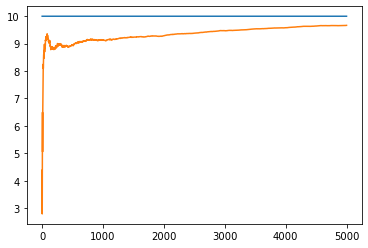

In [1]:
import matplotlib.pyplot as plt
import numpy as np

LOOP_NUMBER = 5000

MU = [3,6,10]
SIGMA = [2,2,2]



class Bandit():
    def __init__(self,mu,sigma) -> None:
        self.mu = mu
        self.sigma = sigma
        self.p_estimate = 0
        self.N_selected = 0
    def pull(self):
        # we get award 
        return np.random.normal(self.mu,self.sigma)
    def update(self,x) -> None:
        self.N_selected +=1
        self.p_estimate = (x + (self.N_selected - 1)* self.p_estimate) / self.N_selected
    
def experiment():
    bandits = [Bandit(mu, sigma) for mu, sigma in zip(MU, SIGMA)]
    rewards = np.zeros(LOOP_NUMBER)
    n_exploied = 0
    n_explore = 0
    n_optimal = 0
    optimal_j = np.argmax([b.mu for b in bandits])
    print(list(zip(MU,SIGMA)))
    EPS = 0.5
    for i in range(LOOP_NUMBER):
        if i % 1000 == 0:
            EPS /=  2
        if np.random.random() < EPS:
            n_explore +=1
            device = np.random.randint(len(bandits))
        else:
            n_exploied +=1
            device = np.argmax([bandit.p_estimate for bandit in bandits])
        
        if device == optimal_j:
            n_optimal +=1
        
        reward = bandits[device].pull()
        rewards[i] = reward
        bandits[device].update(reward)
    for i in bandits:
        print("estimated:",i.p_estimate,i.mu)
    print("n_opt",n_optimal)
    print("opt_est",np.argmax([bandit.p_estimate for bandit in bandits]),"opt",optimal_j)
    cum_rewards = np.cumsum(rewards)
    win_rate = cum_rewards / (np.arange(LOOP_NUMBER) + 1)
    plt.plot(np.ones(LOOP_NUMBER) * np.max(MU))
    plt.plot(win_rate)
    

experiment()


# UCB

C:\Users\MAHDIZ~1\AppData\Local\Temp/ipykernel_10124/3016806112.py:23: RuntimeWarning: invalid value encountered in double_scalars
  return mean + np.sqrt(2 * np.log(total_pull)/nj)
C:\Users\MAHDIZ~1\AppData\Local\Temp/ipykernel_10124/3016806112.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  return mean + np.sqrt(2 * np.log(total_pull)/nj)


estimated: 4.006191192556816 real-prob 3
estimated: 4.785594638334133 real-prob 6
estimated: 10.022058136232696 real-prob 10
n_opt 4997
opt_est 2 opt 2


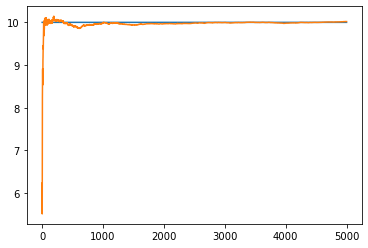

In [2]:
import matplotlib.pyplot as plt
import numpy as np

LOOP_NUMBER = 5000

MU = [3,6,10]
SIGMA = [2,2,2]


class Bandit():
    def __init__(self,mu,sigma) -> None:
        self.mu = mu
        self.sigma = sigma
        self.p_estimate = 0
        self.N_selected = 0
    def pull(self):
        # we get award or not 
        return np.random.normal(self.mu,self.sigma)
    def update(self,x) -> None:
        self.N_selected +=1
        self.p_estimate = (x + (self.N_selected - 1)* self.p_estimate) / self.N_selected
def ucb(mean,total_pull,nj):
    return mean + np.sqrt(2 * np.log(total_pull)/nj)
def experiment():
    bandits = [Bandit(mu,sigma) for mu,sigma in zip(MU,SIGMA)]
    rewards = np.zeros(LOOP_NUMBER)
    n_exploied = 0
    n_explore = 0
    n_optimal = 0
    optimal_j = np.argmax([bandit.mu for bandit in bandits])
    for i in range(LOOP_NUMBER):
        n_exploied +=1
        device = np.argmax([ucb(bandit.p_estimate,i +1,bandit.N_selected) for bandit in bandits])
        
        if device == optimal_j:
            n_optimal +=1
        
        reward = bandits[device].pull()
        rewards[i] = reward
        bandits[device].update(reward)
    for i in bandits:
        print("estimated:",i.p_estimate,"real-prob",i.mu)
    print("n_opt",n_optimal)
    print("opt_est",np.argmax([bandit.p_estimate for bandit in bandits]),"opt",optimal_j)
    cum_rewards = np.cumsum(rewards)
    win_rate = cum_rewards / (np.arange(LOOP_NUMBER) + 1)
    plt.plot(np.ones(LOOP_NUMBER) * np.max(MU))
    plt.plot(win_rate)
    

experiment()